<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/mini_projects/PN_M2_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1kGJfpEC9dayjApciCYZr04NWT7XWkRhV/view?usp=sharing) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [ ]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [ ]:
# YOUR CODE HERE
tess_files = glob.glob('/content/Tess/*/*.wav', recursive=True)
print(f'Tess files are {len(tess_files)}')
ravdess_files = glob.glob('/content/ravdess/*/*.wav', recursive=True)
print(f'Ravdess files are {len(ravdess_files)}')

Tess files are 2679
Ravdess files are 1168


#### Play the sample audio

In [ ]:
# YOUR CODE HERE
print(tess_files[400])
ipd.Audio(tess_files[400])


/content/Tess/YAF_happy/YAF_thin_happy.wav


In [ ]:
print(ravdess_files[200])
ipd.Audio(ravdess_files[200])

/content/ravdess/Actor_18/03-01-08-02-02-02-18_surprised.wav


### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

In [ ]:
# YOUR CODE HERE
all_emt = {}
tess_features, tess_labels = [], []
for wv_file in tess_files+ravdess_files:
    # extracting label
    emt = wv_file.split("_")[-1].split(".")[0]
    if emt in all_emt:
        all_emt[emt] += 1
    else:
        all_emt.update({emt:0})
print(all_emt)



{'neutral': 465, 'fear': 560, 'happy': 556, 'disgust': 570, 'angry': 560, 'sad': 561, 'surprised': 568}


<BarContainer object of 7 artists>

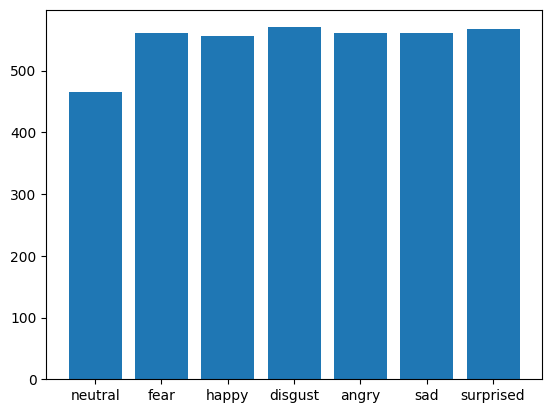

In [ ]:
plt.bar(all_emt.keys(), all_emt.values())

#### Visualize sample audio signal using librosa

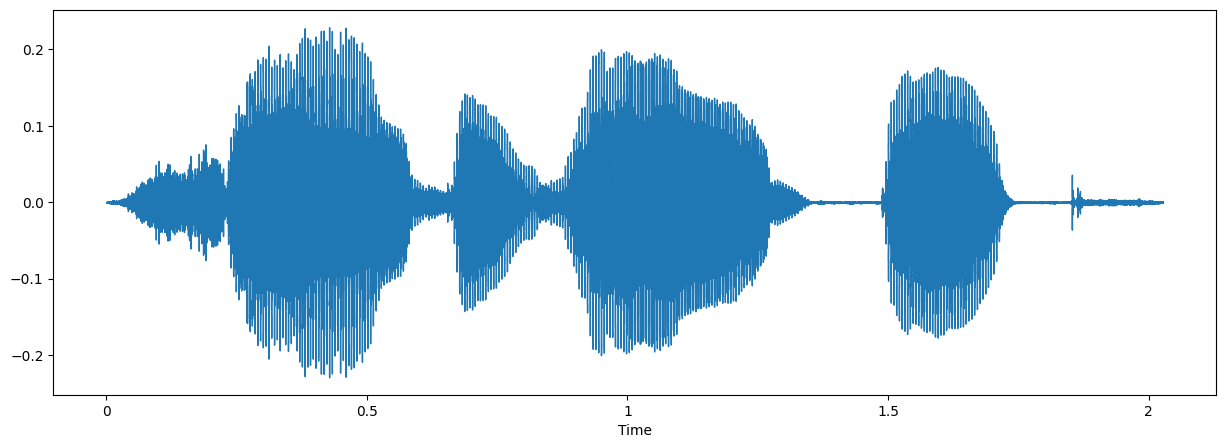

In [ ]:
# YOUR CODE HERE
sample_audio_path = tess_files[120]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

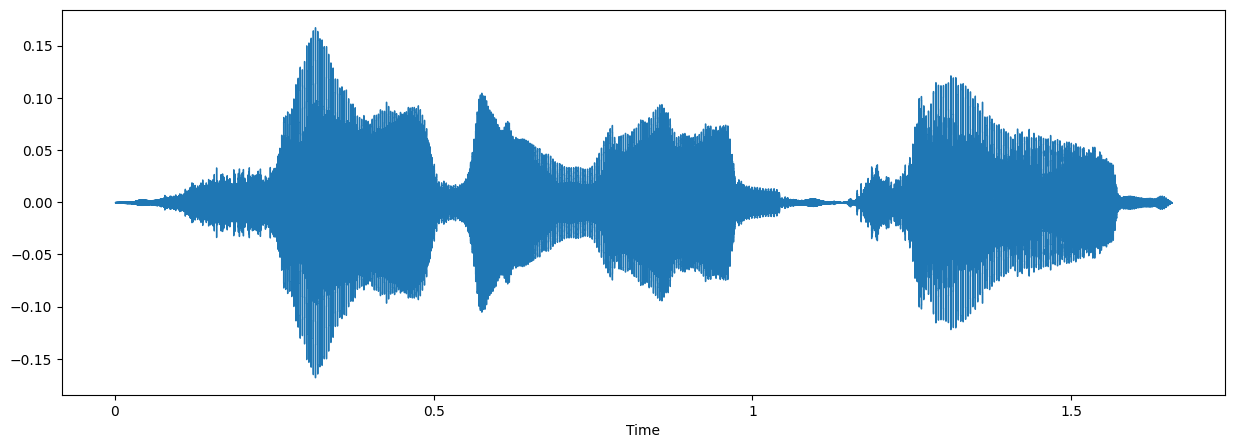

In [ ]:
sample_audio_path = tess_files[220]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [ ]:
# YOUR CODE HERE
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute mfcc
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [ ]:
# extract_feature(tess_files[105])

#### Create a dictionary or a function to encode the emotions

In [ ]:
# YOUR CODE HERE
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

emotions_map = {
    'neutral': 0,
    'calm': 1,
    'happy': 2,
    'sad': 3,
    'angry': 4,
    'fear': 5,
    'disgust': 6,
    'surprised': 7,
    'unknown': 8  # You can assign a numerical label for 'unknown' if needed
}

emotions_map

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7,
 'unknown': 8}

In [ ]:

emotion_decoding = {
     0 : 'neutral',
     1 : 'calm',
     2 : 'happy',
     3 : 'sad',
     4 : 'angry',
     5 : 'fear',
     6 : 'disgust',
     7 : 'surprised'
}

#### TESS data feature extraction

In [ ]:
# YOUR CODE HERE
# Declare list to append features and labels
all_emt = []
tess_features, tess_labels = [], []
for wv_file in tess_files:
  tess_features.append(extract_feature(wv_file))
  # extracting label
  emt = wv_file.split("_")[-1].split(".")[0]
  if emt not in all_emt:
    all_emt.append(emt)
  tess_labels.append(emotions_map[emt])


In [ ]:
print(set(all_emt))

{'disgust', 'angry', 'fear', 'neutral', 'sad', 'surprised', 'happy'}


In [ ]:
print(set(tess_labels))

{0, 2, 3, 4, 5, 6, 7}


In [ ]:
len(tess_labels), len(tess_labels)

(2679, 2679)

#### Ravdess data feature extraction

In [ ]:
# YOUR CODE HERE
# Declare list to append features and labels
ravdess_features, ravdess_labels = [], []
for wv_file in ravdess_files:
  ravdess_features.append(extract_feature(wv_file))
  # extracting label
  emt = wv_file.split("_")[-1].split(".")[0]
  if emt not in all_emt:
    all_emt.append(emt)
  ravdess_labels.append(emotions_map[emt])

print(set(all_emt))
print(set(ravdess_labels))
len(ravdess_features), len(ravdess_labels)

{'disgust', 'angry', 'fear', 'neutral', 'sad', 'surprised', 'happy'}
{0, 2, 3, 4, 5, 6, 7}


(1168, 1168)

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# YOUR CODE HERE
df_tess = pd.DataFrame(data=tess_features)
df_tess = df_tess.assign(label=tess_labels)
# df_tess.shape
# df_tess.head(5)
df_ravdess = pd.DataFrame(data=ravdess_features)
df_ravdess = df_ravdess.assign(label=ravdess_labels)
# df_ravdess.shape
# df_ravdess.head(5)
df = pd.concat([df_tess, df_ravdess], ignore_index=True)
print(df.shape)
# print(df.sample(5))
# print(df.describe())
df.to_csv('tess_ravdess_dataset.csv')

(3847, 181)


#### Split the data into train and test

In [ ]:
# YOUR CODE HERE
X = df.loc[:, ~df.columns.isin(['label'])]
y = df.loc[:,'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)



### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
# YOUR CODE HERE
grid_param = {
                'n_estimators':[500,1000],
                'max_depth' : range(10,21,10),
                'min_samples_split': range(10,21,10)
            }

# rf_clf = RandomForestClassifier(random_state= 42)
# grid_search = GridSearchCV(estimator=rf_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

# grid_search.fit(X_train, y_train)
# grid_search.best_params_


In [ ]:
rf_clf = RandomForestClassifier(
                                n_estimators=1200,
                                max_depth=20,
                                min_samples_split=10,
                                max_features=30,
                                random_state= 42
                                )
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print(rf_clf.__class__.__name__, accuracy_score(y_test, y_pred_rf))

RandomForestClassifier 0.8394904458598726


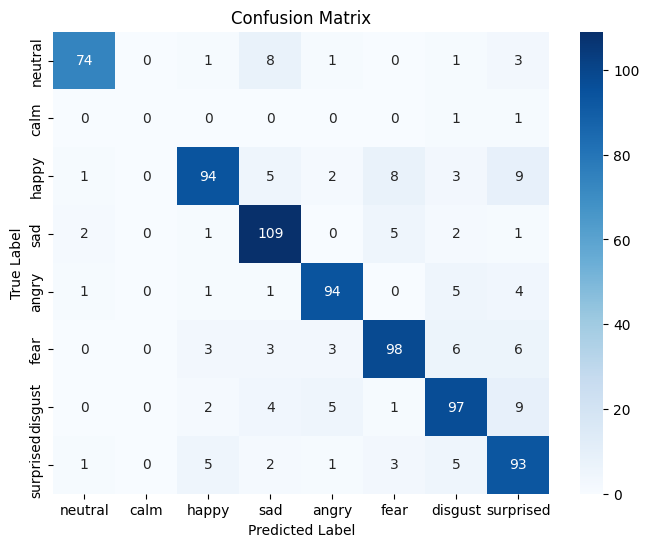

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_decoding[i] for i in sorted(set(y))],
            yticklabels=[emotion_decoding[i] for i in sorted(set(y))])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Apply the voting classifier

In [ ]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT

# Instantiate LogisticRegression, KNN, SVC and VotingClassifier
log_clf = LogisticRegression()
knn_clf = KNN()
svm_clf = SVC(probability= True)
dt_clf = DT()

classifiers = [('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf), ('dt', dt_clf)]

voting_clf = VotingClassifier(estimators= classifiers, voting='soft')

for clf in (log_clf, knn_clf, svm_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7675324675324675
KNeighborsClassifier 0.8025974025974026
SVC 0.6935064935064935
DecisionTreeClassifier 0.7545454545454545
VotingClassifier 0.8051948051948052


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# YOUR CODE HERE
# !wget https://drive.google.com/drive/folders/12xu_acrN4C67LT4ZY7XNGkOGTitrKEpx
team_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/Team11_audio_files/*/*.wav', recursive=True)

print(len(team_files))

84


#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE

team_features, team_labels = [], []
emts = []
for wv_file in team_files:
    try:
        # extracting label
        emt = (wv_file.split("_")[-1].split(".")[0]).lower()
        emts.append(emt)
        team_labels.append(emotions_map[emt])
        team_features.append(extract_feature(wv_file))
    except Exception as err:
        print(f'Exception {err}: {emt} not recognized is processing file {wv_file}')
        continue
print(set(emts))
print(set(team_files))
len(team_features), len(team_labels), len(team_files)


Exception '03': 03 not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Neutral/SK_Neutral_2024-03-07_12-34-49_03.wav
Exception '01': 01 not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Calm/SK_Calm_2024-03-07_10-26-18_01.wav
Exception '06': 06 not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Fearful/SK_Fear_2024-03-07_12-34-30_06.wav
Exception 'fearful': fearful not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Fearful/SK_Back_fearful.wav
Exception 'fearful': fearful not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Fearful/SK_Bar_fearful.wav
Exception 'surprise': surprise not recognized is processing file /content/drive/MyDrive/Colab Notebooks/Team11_audio_files/Surprised/PJ_back_surprise.wav
Exception 'surprise': surprise not recognized is processing file /content/drive/MyDrive

(77, 77, 84)

In [ ]:
df_team = pd.DataFrame(data=team_features)
df_team = df_team.assign(label=team_labels)

df_new = pd.concat([df_tess, df_ravdess, df_team], ignore_index=True)

#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = df_new.loc[:, ~df.columns.isin(['label'])]
y = df_new.loc[:,'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

rf_clf = RandomForestClassifier(
                                n_estimators=1200,
                                # max_depth=20,
                                min_samples_split=10,
                                max_features=100,
                                random_state= 42
                                )
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(rf_clf.__class__.__name__, accuracy_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))


RandomForestClassifier 0.8305732484076433
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        88
           1       0.00      0.00      0.00         2
           2       0.87      0.76      0.81       122
           3       0.80      0.88      0.84       120
           4       0.88      0.86      0.87       106
           5       0.86      0.83      0.85       119
           6       0.80      0.79      0.79       118
           7       0.73      0.85      0.78       110

    accuracy                           0.83       785
   macro avg       0.73      0.73      0.73       785
weighted avg       0.83      0.83      0.83       785



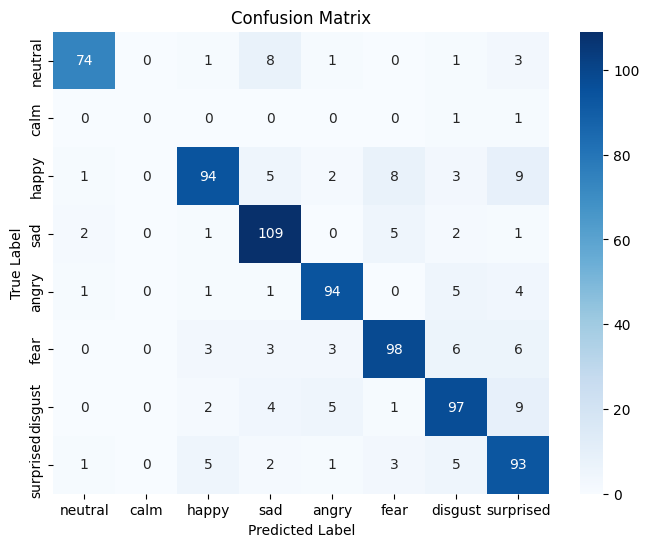

In [ ]:
# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_decoding[i] for i in sorted(set(y))],
            yticklabels=[emotion_decoding[i] for i in sorted(set(y))])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL = rf_clf
emotions = emotions_map
emotions

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7,
 'unknown': 8}

In [ ]:
import pickle
# Save the model to a PKL file
model_filename = '/content/trained_model/trained_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(MODEL, model_file)


In [ ]:
import joblib

# Step 1: Load Kaggle Dataset (adjust paths accordingly)
csv_file_path = '/content/drive/MyDrive/kaggel/b7-audio-emotion-classification 2/Sample_Submission.csv'
df_labels = pd.read_csv(csv_file_path)

# Step 2: Load Pre-trained Model
model_path = '/content/trained_model/trained_model.pkl'  # Adjust path
pretrained_model = joblib.load(model_path)

# Step 3: Extract Features from Audio Files
audio_dir = '/content/drive/MyDrive/kaggel/b7-audio-emotion-classification 2/Kaggle_Testset/Kaggle_Testset'
audio_filenames = df_labels['Id']  # Assuming column name is 'AudioId'
audio_features = []

for audio_filename in audio_filenames:
  audio_path = f'{audio_dir}/{audio_filename}.wav'
  audio_features.append(extract_feature(audio_path))

# Step 4: Preprocess the Features if needed

# Step 5: Make Predictions
predictions = pretrained_model.predict(audio_features)

decoded_predictions = [emotion_decoding[prediction] for prediction in predictions]
# Step 6: Save Predictions to CSV
output_df = pd.DataFrame({'Id': audio_filenames, 'Label': decoded_predictions})
output_df.to_csv('/content/submission/Team11_submission.csv', index=False)

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

happy


### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
